<a href="https://colab.research.google.com/github/benafshapostwala/Data_Mining_CW/blob/main/Data_Mining_CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing and mounting google drive as we have stored the data in a folder here (saved in email id benbakes21@gmail.com)
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#importing the excel file containing the data using pandas
import pandas as pd
data = pd.ExcelFile('/content/gdrive/My Drive/Data_mining_cw2_data/LendingClubLoans2018-2020.xlsx')

In [4]:
#converting excel file to pandas dataframe
lending_data=pd.read_excel(data)

In [6]:
#checking how many rows
lending_data.shape[0]

77159

In [7]:
#inspecting the first 5 rows of the dataframe
lending_data.head()

,id,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,earliest_cr_line,issue_d,last_pymnt_d,next_pymnt_d,annual_inc,annual_inc_joint,verification_status,verification_status_joint,pymnt_plan,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,payment_plan_start_date,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,113924213,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,2001-01-01,2017-08-01,2020-04-01,NaT,110000.0,NaN,Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,...,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,113101099,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,2000-12-01,2017-07-01,2019-06-01,NaT,54000.0,NaN,Not Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,...,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,113672609,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,1986-04-01,2017-07-01,2020-05-01,2020-06-01,74000.0,NaN,Verified,NaN,n,home_improvement,N,NaN,NaN,NaN,NaT,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,...,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,115053799,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,1990-02-01,2017-08-01,2019-10-01,NaT,58000.0,NaN,Source Verified,NaN,n,debt_consolidation,N,NaN,NaN,NaN,NaT,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,...,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,6317122,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,1988-03-01,2013-08-01,2019-01-01,NaT,94020.0,NaN,Verified,NaN,n,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,2017-11-01,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,...,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43


In [8]:
#by describing the data, we can obtain a summary statistical report of all numerical variables
num_data=lending_data.describe()
Numerical_variables=num_data.columns
#now we can create a list of all numerical variables without listing them one by one
Numerical_variables=list(Numerical_variables)
Numerical_variables


['id',
 'loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'annual_inc_joint',
 'dti',
 'dti_joint',
 'delinq_2yrs',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'mort_acc',
 'open_acc',
 'open_acc_6m',
 'acc_open_past_24mths',
 'pub_rec',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'total_cu_tl',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_bal_il',
 'total_rev_hi_lim',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_rcnt_il',
 'mths_since_last_delinq',
 'mths_since_recent_revol_delinq',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'open_act_il',
 'open_

In [9]:
#Our target variable is 'loan_status' so we must take a look at how many classes we are dealing with
print(lending_data['loan_status'].unique())
#here we list out all the column names or variables in our data
all_variables=list(lending_data.columns)
all_variables

['Fully Paid' 'Charged Off' 'Current' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']


['id',
 'emp_title',
 'application_type',
 'home_ownership',
 'loan_status',
 'loan_amnt',
 'int_rate',
 'term',
 'installment',
 'grade',
 'earliest_cr_line',
 'issue_d',
 'last_pymnt_d',
 'next_pymnt_d',
 'annual_inc',
 'annual_inc_joint',
 'verification_status',
 'verification_status_joint',
 'pymnt_plan',
 'purpose',
 'hardship_flag',
 'hardship_reason',
 'hardship_type',
 'hardship_status',
 'payment_plan_start_date',
 'dti',
 'dti_joint',
 'delinq_2yrs',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'fico_range_low',
 'fico_range_high',
 'last_fico_range_high',
 'last_fico_range_low',
 'mort_acc',
 'open_acc',
 'open_acc_6m',
 'acc_open_past_24mths',
 'pub_rec',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'total_cu_tl',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_bal_il',
 'total_rev_hi_lim',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'tota

In [10]:
import numpy as np
#to obtain a list of all categorical variables, we can comapare the all_variables list and Numerical_variables list
# to find the elements that are NOT listed in Numerical variables as they would have to be categorical in nature. 
#This is a short cut to avoid listing out by typing.
Categorical_variables = list(np.setdiff1d(all_variables,Numerical_variables))
Categorical_variables
#taking a look at the different categories for each categorical variable that will help us decide which encoder to use
for i in Categorical_variables:
  print(i,lending_data[i].unique())

application_type ['Individual' 'Joint App']
earliest_cr_line ['2001-01-01T00:00:00.000000000' '2000-12-01T00:00:00.000000000'
 '1986-04-01T00:00:00.000000000' '1990-02-01T00:00:00.000000000'
 '1988-03-01T00:00:00.000000000' '2003-11-01T00:00:00.000000000'
 '1986-09-01T00:00:00.000000000' '2005-06-01T00:00:00.000000000'
 '2010-05-01T00:00:00.000000000' '1992-05-01T00:00:00.000000000'
 '2007-07-01T00:00:00.000000000' '2012-08-01T00:00:00.000000000'
 '1998-03-01T00:00:00.000000000' '2000-08-01T00:00:00.000000000'
 '2010-10-01T00:00:00.000000000' '1999-12-01T00:00:00.000000000'
 '2001-07-01T00:00:00.000000000' '2006-12-01T00:00:00.000000000'
 '2006-09-01T00:00:00.000000000' '1998-04-01T00:00:00.000000000'
 '1996-01-01T00:00:00.000000000' '2003-10-01T00:00:00.000000000'
 '2005-04-01T00:00:00.000000000' '2003-07-01T00:00:00.000000000'
 '2007-08-01T00:00:00.000000000' '2002-04-01T00:00:00.000000000'
 '2004-06-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '2005-01-01T00:00:00.0000000

In [11]:
#taking a look at missing data for each column
lending_data.isna().sum()

id                                                0
emp_title                                      5862
application_type                                  0
home_ownership                                    0
loan_status                                       0
                                              ...  
deferral_term                                 72668
hardship_amount                               71042
hardship_payoff_balance_amount                71042
hardship_last_payment_amount                  71042
orig_projected_additional_accrued_interest    71170
Length: 108, dtype: int64

In [12]:
#dropping columns with date and irrelevant features like id
lending_data = lending_data.drop(['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'payment_plan_start_date', 'pymnt_plan'], axis=1)
lending_data
lending_data = lending_data.drop(['id'], axis=1)
lending_data

,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,annual_inc_joint,verification_status,verification_status_joint,purpose,hardship_flag,hardship_reason,hardship_type,hardship_status,dti,dti_joint,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,revol_bal_joint,deferral_term,hardship_amount,hardship_payoff_balance_amount,hardship_last_payment_amount,orig_projected_additional_accrued_interest
0,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,110000.0,NaN,Verified,NaN,debt_consolidation,N,NaN,NaN,NaN,9.13,NaN,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,...,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,54000.0,NaN,Not Verified,NaN,debt_consolidation,N,NaN,NaN,NaN,20.67,NaN,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,...,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,74000.0,NaN,Verified,NaN,home_improvement,N,NaN,NaN,NaN,18.33,NaN,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,...,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,58000.0,NaN,Source Verified,NaN,debt_consolidation,N,NaN,NaN,NaN,29.05,NaN,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,...,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,94020.0,NaN,Verified,NaN,debt_consolidation,N,NATURAL_DISASTER,INTEREST ONLY-3 MONTHS DEFERRAL,COMPLETED,23.22,NaN,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,...,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,NaN,3.0,38.81,5283.25,42.29,116.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,IT analyst,Individual,MORTGAGE,Current,3500,0.1505,36 months,121.42,C,109000.0,NaN,Verified,NaN,other,N,NaN,NaN,NaN,32.49,NaN,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06,3029.43,...,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
77155,Principal IA Engineer,Individual,MORTGAGE,Current,2000,0.0797,36 months,62.65,A,180000.0,NaN,Not Verified,NaN,home_improvement,N,NaN,N

In [13]:
#finding the number of null values for each variable or column
nul_vals=lending_data.isnull().sum()
nul_vals=nul_vals.reset_index()
#Checking which variables have more than 60% of missing values
high_nul_vals=nul_vals[nul_vals[0] >= 46295]
print(list(high_nul_vals['index']))

['annual_inc_joint', 'verification_status_joint', 'hardship_reason', 'hardship_type', 'hardship_status', 'dti_joint', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'deferral_term', 'hardship_amount', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'orig_projected_additional_accrued_interest']


In [14]:
#dropping all the columns or variables that have too many nan values, now we can encode the categorical variables
lending_data = lending_data.drop(['annual_inc_joint', 'verification_status_joint', 'hardship_reason', 'hardship_type', 'hardship_status', 'dti_joint', 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'deferral_term', 'hardship_amount', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'orig_projected_additional_accrued_interest'], axis=1)
#lending_data = lending_data.drop(['emp_title'], axis=1)
lending_data

,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Stagehand,Individual,RENT,Fully Paid,35000,0.1505,36 months,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551,22049,9213.0,...,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,Detention Deputy,Individual,RENT,Charged Off,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,debt_consolidation,N,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76,86785,76738.0,...,1.0,1.0,13.0,NaN,147.0,199,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
2,NaN,Individual,MORTGAGE,Current,20000,0.1408,60 months,466.20,C,74000.0,Verified,home_improvement,N,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,0.0,0.0,0,75396,24268.0,...,2.0,3.0,3.0,NaN,128.0,375,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0
3,Driver,Individual,RENT,Fully Paid,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104,43001,22068.0,...,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,JP Morgan Chase,Individual,MORTGAGE,Fully Paid,24000,0.0890,60 months,497.04,A,94020.0,Verified,debt_consolidation,N,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,NaN,0,353484,NaN,...,122.0,14.0,NaN,NaN,147.0,308,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,IT analyst,Individual,MORTGAGE,Current,3500,0.1505,36 months,121.42,C,109000.0,Verified,other,N,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0,246635,33924.0,...,13.0,0.0,23.0,NaN,170.0,267,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,Principal IA Engineer,Individual,MORTGAGE,Current,2000,0.0797,36 months,62.65,A,180000.0,Not Verified,home_improvement,N,10.64,0,0.0,4.0,0,725,729,674,670,4,9,1.0

In [15]:
lending_data = lending_data.drop(['emp_title'], axis=1)

In [16]:
#View the filtered set of categorical and numerical variables
f_num_data=lending_data.describe()
f_Numerical_variables=f_num_data.columns
#now we can create a list of all numerical variables without listing them one by one
f_Numerical_variables=list(f_Numerical_variables)
f_Numerical_variables
f_all_variables=list(lending_data.columns)
f_all_variables
f_Categorical_variables = list(np.setdiff1d(f_all_variables,f_Numerical_variables))
f_Categorical_variables
#taking a look at the different categories for each categorical variable that will help us decide which encoder to use
for i in f_Categorical_variables:
  print(i,lending_data[i].unique())

application_type ['Individual' 'Joint App']
grade ['C' 'D' 'A' 'B' 'E' 'G' 'F']
hardship_flag ['N' nan 'Y']
home_ownership ['RENT' 'MORTGAGE' 'OWN' 'NONE' 'ANY']
initial_list_status ['w' 'f']
loan_status ['Fully Paid' 'Charged Off' 'Current' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']
purpose ['debt_consolidation' 'home_improvement' 'other' 'medical' 'credit_card'
 'vacation' 'house' 'major_purchase' 'small_business' 'moving' 'car'
 'renewable_energy' 'wedding']
term ['36 months' '60 months']
verification_status ['Verified' 'Not Verified' 'Source Verified']


In [17]:
#Checking how balanced the dataset is, i.e. how many entries for each category of the traget variable
lending_data['loan_status'].value_counts(dropna=False)


Fully Paid            34289
Current               32039
Charged Off            9614
Late (31-120 days)      659
In Grace Period         448
Late (16-30 days)        96
Default                  14
Name: loan_status, dtype: int64

In [18]:
#As there are very few data points for the target variable categories of late 31-120,in grace period and late 16--30 and default, we merge them to get a category named late or default
lending_data['loan_status'] = lending_data['loan_status'].replace('Late (31-120 days)','Late_or_default')
lending_data['loan_status'] = lending_data['loan_status'].replace('In Grace Period','Late_or_default')
lending_data['loan_status'] = lending_data['loan_status'].replace('Late (16-30 days)','Late_or_default')
lending_data['loan_status'] = lending_data['loan_status'].replace('Default','Late_or_default')
lending_data['loan_status'].value_counts(dropna=False)

Fully Paid         34289
Current            32039
Charged Off         9614
Late_or_default     1217
Name: loan_status, dtype: int64

In [19]:
#encoding the target variable loan_status using basic ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#label = le.fit_transform(label)
Ord_enc=OrdinalEncoder()
lending_data["loan_status"] = le.fit_transform(lending_data[["loan_status"]])

#lending_data[["loan_stat_code", "loan_status"]]
#print(lending_data["loan_stat_code"].unique())
#print(lending_data["loan_status"].unique())
lending_data

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Individual,RENT,2,35000,0.1505,36 months,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551,22049,9213.0,22800,...,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,Individual,RENT,0,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,debt_consolidation,N,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76,86785,76738.0,23100,...,1.0,1.0,13.0,NaN,147.0,199,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
2,Individual,MORTGAGE,1,20000,0.1408,60 months,466.20,C,74000.0,Verified,home_improvement,N,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,0.0,0.0,0,75396,24268.0,35900,...,2.0,3.0,3.0,NaN,128.0,375,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0
3,Individual,RENT,2,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104,43001,22068.0,24100,...,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,Individual,MORTGAGE,2,24000,0.0890,60 months,497.04,A,94020.0,Verified,debt_consolidation,N,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,NaN,0,353484,NaN,63200,...,122.0,14.0,NaN,NaN,147.0,308,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,Individual,MORTGAGE,1,3500,0.1505,36 months,121.42,C,109000.0,Verified,other,N,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0,246635,33924.0,81750,...,13.0,0.0,23.0,NaN,170.0,267,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,Individual,MORTGAGE,1,2000,0.0797,36 months,62.65,A,180000.0,Not Verified,home_improvement,N,10.64,0,0.0,4.0,0,725,729,674,670,4,9,1.0,3,0,20,w,246.31,246.31,2003.910000,2003.91,1753.69,250.22,0.0,0.0,0,324151,30859.0,14700,...,68.0,

In [20]:
lending_data['hardship_flag'].isna().sum()
lending_data = lending_data[lending_data['hardship_flag'].notna()]
lending_data['hardship_flag'].isna().sum()

0

In [21]:

lending_data["hardship_flag"] = Ord_enc.fit_transform(lending_data[["hardship_flag"]])
lending_data["home_ownership"] = Ord_enc.fit_transform(lending_data[["home_ownership"]])
lending_data["application_type"] = Ord_enc.fit_transform(lending_data[["application_type"]])
lending_data["initial_list_status"] = Ord_enc.fit_transform(lending_data[["initial_list_status"]])
lending_data["purpose"] = Ord_enc.fit_transform(lending_data[["purpose"]])
lending_data["term"] = Ord_enc.fit_transform(lending_data[["term"]])
lending_data["verification_status"] = Ord_enc.fit_transform(lending_data[["loan_status"]])
lending_data







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,0.0,4.0,2,35000,0.1505,0.0,1214.15,C,110000.0,2.0,2.0,0.0,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,1.0,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551,22049,9213.0,22800,...,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,0.0,4.0,0,21000,0.1408,1.0,489.51,C,54000.0,0.0,2.0,0.0,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,1.0,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76,86785,76738.0,23100,...,1.0,1.0,13.0,NaN,147.0,199,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
2,0.0,1.0,1,20000,0.1408,1.0,466.20,C,74000.0,1.0,3.0,0.0,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,1.0,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,0.0,0.0,0,75396,24268.0,35900,...,2.0,3.0,3.0,NaN,128.0,375,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0
3,0.0,4.0,2,16000,0.1903,0.0,586.74,D,58000.0,2.0,2.0,0.0,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,1.0,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104,43001,22068.0,24100,...,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,0.0,1.0,2,24000,0.0890,1.0,497.04,A,94020.0,2.0,2.0,0.0,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,1.0,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,NaN,0,353484,NaN,63200,...,122.0,14.0,NaN,NaN,147.0,308,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,0.0,1.0,1,3500,0.1505,0.0,121.42,C,109000.0,1.0,8.0,0.0,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,1.0,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0,246635,33924.0,81750,...,13.0,0.0,23.0,NaN,170.0,267,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,0.0,1.0,1,2000,0.0797,0.0,62.65,A,180000.0,1.0,3.0,0.0,10.64,0,0.0,4.0,0,725,729,674,670,4,9,1.0,3,0,20,1.0,246.31,246.31,2003.910000,2003.91,1753.69,250.22,0.0,0.0,0,324151,30859.0,14700,...,68.0,3.0,6.0,NaN,138.0,177,10,6,3.0,1.0,2.0,54.0,66.8,55.0,0.590,1.0,1.0,4573.0,40519.0,3883.0,0.00,0,0.0000,0,0,3,4,3,4,9,5,7,4,9,0,2,100.0,66.7,0,0
77156,0.0,4.0,2,7000,0.0532,0.0,210.81,A,148000.0,2.0,2.0,0.0,11.30,0,0.0,0.0,0

In [ ]:
'''lending_data['emp_title'].isna().sum()
lending_data = lending_data[lending_data['emp_title'].notna()]
lending_data['emp_title'].isna().sum()
'''

"lending_data['emp_title'].isna().sum()\nlending_data = lending_data[lending_data['emp_title'].notna()]\nlending_data['emp_title'].isna().sum()\n"

In [ ]:
lending_data

,emp_title,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,Stagehand,0.0,4.0,3.0,35000,0.1505,0.0,1214.15,C,110000.0,3.0,2.0,0.0,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,1.0,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551,22049,9213.0,...,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,Detention Deputy,0.0,4.0,0.0,21000,0.1408,1.0,489.51,C,54000.0,0.0,2.0,0.0,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,1.0,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76,86785,76738.0,...,1.0,1.0,13.0,NaN,147.0,199,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
3,Driver,0.0,4.0,3.0,16000,0.1903,0.0,586.74,D,58000.0,3.0,2.0,0.0,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,1.0,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104,43001,22068.0,...,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,JP Morgan Chase,0.0,1.0,3.0,24000,0.0890,1.0,497.04,A,94020.0,3.0,2.0,0.0,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,1.0,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,NaN,0,353484,NaN,...,122.0,14.0,NaN,NaN,147.0,308,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
5,sales agent,0.0,1.0,0.0,35000,0.2000,1.0,927.29,D,110000.0,0.0,8.0,0.0,17.73,0,3.0,3.0,2,765,769,554,550,1,11,6.0,7,0,18,1.0,0.00,0.00,14578.990000,14578.99,4111.79,6049.51,0.0,4.0,0,145673,63702.0,...,125.0,2.0,2.0,NaN,169.0,141,5,2,4.0,5.0,5.0,76.0,0.0,64.0,0.256,1.0,1.0,0.0,13243.0,3000.0,4417.69,0,795.1842,0,0,0,1,1,2,9,5,7,1,11,0,6,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,IT analyst,0.0,1.0,1.0,3500,0.1505,0.0,121.42,C,109000.0,1.0,8.0,0.0,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,1.0,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0,246635,33924.0,...,13.0,0.0,23.0,NaN,170.0,267,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,Principal IA Engineer,0.0,1.0,1.0,2000,0.0797,0.0,62.65,A,180000.0,1.0,3.0,0.0,10.64,0,0.0,4.0,0,725,729,674,670,4,9,1.0,3,0,20,1.0,246.31,246.31,2003.910000,2003.91,1753.69,250.22,0.0,0.0,0,324151,30859.0,...,68.0,3.0,6.0,NaN,138.0,177,10,6,3.0,1.0,2.0,54.0,66.8,55.0,0.590,1.0,1.0,4573.0,40519.0,3883.0,0.00,0,0.0000,0,0,3,4,3,4,9,5,7,4,9,0,2,100.0,66.7,0,0
77156,Attorney,0.0,4.0,3.0,

In [ ]:
#encoding all nominal categorical variables using backward difference encoder
'''
import category_encoders as ce
from category_encoders import BackwardDifferenceEncoder
encoder = ce.BackwardDifferenceEncoder(cols=['application_type','hardship_flag','home_ownership','initial_list_status','purpose','term','verification_status'])
lending_data = encoder.fit_transform(lending_data)
lending_data
'''

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,application_type_0,home_ownership_0,home_ownership_1,home_ownership_2,home_ownership_3,loan_status,loan_amnt,int_rate,term_0,installment,grade,annual_inc,verification_status_0,verification_status_1,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,hardship_flag_0,hardship_flag_1,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,1,-0.5,-0.8,-0.6,-0.4,-0.2,3.0,35000,0.1505,-0.5,1214.15,C,110000.0,-0.666667,-0.333333,-0.923077,-0.846154,-0.769231,-0.692308,-0.615385,-0.538462,-0.461538,-0.384615,-0.307692,-0.230769,-0.153846,-0.076923,-0.666667,-0.333333,9.13,0,1.0,1.0,1,680,684,689,685,1,7,...,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,1,-0.5,-0.8,-0.6,-0.4,-0.2,0.0,21000,0.1408,0.5,489.51,C,54000.0,0.333333,-0.333333,-0.923077,-0.846154,-0.769231,-0.692308,-0.615385,-0.538462,-0.461538,-0.384615,-0.307692,-0.230769,-0.153846,-0.076923,-0.666667,-0.333333,20.67,0,1.0,1.0,1,710,714,589,585,0,13,...,1.0,1.0,13.0,NaN,147.0,199,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
2,1,-0.5,0.2,-0.6,-0.4,-0.2,1.0,20000,0.1408,0.5,466.20,C,74000.0,-0.666667,-0.333333,0.076923,-0.846154,-0.769231,-0.692308,-0.615385,-0.538462,-0.461538,-0.384615,-0.307692,-0.230769,-0.153846,-0.076923,-0.666667,-0.333333,18.33,0,2.0,3.0,1,760,764,689,685,1,14,...,2.0,3.0,3.0,NaN,128.0,375,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0
3,1,-0.5,-0.8,-0.6,-0.4,-0.2,3.0,16000,0.1903,-0.5,586.74,D,58000.0,0.333333,0.666667,-0.923077,-0.846154,-0.769231,-0.692308,-0.615385,-0.538462,-0.461538,-0.384615,-0.307692,-0.230769,-0.153846,-0.076923,-0.666667,-0.333333,29.05,0,0.0,1.0,1,670,674,644,640,1,10,...,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,1,-0.5,0.2,-0.6,-0.4,-0.2,3.0,24000,0.0890,0.5,497.04,A,94020.0,-0.666667,-0.333333,-0.923077,-0.846154,-0.769231,-0.692308,-0.615385,-0.538462,-0.461538,-0.384615,-0.307692,-0.230769,-0.153846,-0.076923,-0.666667,-0.333333,23.22,0,NaN,NaN,0,785,789,759,755,6,12,...,122.0,14.0,NaN,NaN,147.0,308,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,1,-0.5,0.2,-0.6,-0.4,-0.2,1.0,3500,0.1505,-0.5,121.42,C,109000.0,-0.666667,-0.333333,0.076923,0.153846,-0.769231,-0.692308,-0.615385,-0.538462,-0.461538,-0.384615,-0.307692,-0.230769,-0.153846,-0.076923,-0.666667,-0.333333,32.49,0,0.0,3.0,4,695,699,724,720,2,16,...,13.0,0.0,23.0,NaN,170.0,267,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,1,

In [ ]:
lending_data

NameError: ignored

In [22]:
#lending_data['grade'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6})
lending_data["grade"].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}, inplace=True)
lending_data

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,application_type,home_ownership,loan_status,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,0.0,4.0,2,35000,0.1505,0.0,1214.15,2,110000.0,2.0,2.0,0.0,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,1.0,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551,22049,9213.0,22800,...,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,0.0,4.0,0,21000,0.1408,1.0,489.51,2,54000.0,0.0,2.0,0.0,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,1.0,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76,86785,76738.0,23100,...,1.0,1.0,13.0,NaN,147.0,199,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
2,0.0,1.0,1,20000,0.1408,1.0,466.20,2,74000.0,1.0,3.0,0.0,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,1.0,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,0.0,0.0,0,75396,24268.0,35900,...,2.0,3.0,3.0,NaN,128.0,375,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0
3,0.0,4.0,2,16000,0.1903,0.0,586.74,3,58000.0,2.0,2.0,0.0,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,1.0,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104,43001,22068.0,24100,...,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,0.0,1.0,2,24000,0.0890,1.0,497.04,0,94020.0,2.0,2.0,0.0,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,1.0,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,NaN,0,353484,NaN,63200,...,122.0,14.0,NaN,NaN,147.0,308,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,0.0,1.0,1,3500,0.1505,0.0,121.42,2,109000.0,1.0,8.0,0.0,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,1.0,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0,246635,33924.0,81750,...,13.0,0.0,23.0,NaN,170.0,267,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,0.0,1.0,1,2000,0.0797,0.0,62.65,0,180000.0,1.0,3.0,0.0,10.64,0,0.0,4.0,0,725,729,674,670,4,9,1.0,3,0,20,1.0,246.31,246.31,2003.910000,2003.91,1753.69,250.22,0.0,0.0,0,324151,30859.0,14700,...,68.0,3.0,6.0,NaN,138.0,177,10,6,3.0,1.0,2.0,54.0,66.8,55.0,0.590,1.0,1.0,4573.0,40519.0,3883.0,0.00,0,0.0000,0,0,3,4,3,4,9,5,7,4,9,0,2,100.0,66.7,0,0
77156,0.0,4.0,2,7000,0.0532,0.0,210.81,0,148000.0,2.0,2.0,0.0,11.30,0,0.0,0.0,0

In [ ]:
'''
column_means = lending_data.mean()
lending_data = lending_data.fillna(column_means)
'''

In [ ]:
'''
from sklearn.impute import SimpleImputer

#create the simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

#fit the imputer to our data.
#Any data we impute on in the train stage we need to perform identically to our test.
lending_data = imputer.fit_transform(lending_data)
'''


In [23]:
from sklearn.impute import KNNImputer
nan = np.nan

#Designate the features to become X
X_features = lending_data.loc[:, lending_data.columns != 'loan_status']  #independent columns
y_target = lending_data['loan_status']    #target column

X= X_features

#Apply KNN imputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
ImputedX=imputer.fit_transform(X)

# Convert output to a data frame to show the stats
dataframe = pd.DataFrame.from_records(ImputedX)
dataframe.columns = X_features.columns
dataframe.describe()                        

,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
count,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,7.553200e+04,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,7.553200e+04,75532.00000,7.553200e+04,7.553200e+04,...,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.000000,75532.00000,75532.000000,75532.000000
mean,0.120280,2.430175,15143.612310,0.131247,0.315773,442.508199,1.599997,7.848008e+04,1.346026,2.656702,0.047265,19.806636,0.319467,0.969099,1.946725,0.497868,701.847892,705.848210,689.796431,677.106326,1.369989,11.473759,0.874854,4.365699,0.171662,22.814939,0.796868,2346.809079,2346.487016,14766.415421,14761.393608,11370.623056,3230.861880,3.009448,1.384599,206.023222,1.420864e+05,35377.82287,3.514213e+04,1.802757e+05,...,25.404312,7.245101,23.124636,34.796212,124.512419,179.389080,14.811179,8.660607,2.815337,0.609847,1.473554,65.933161,54.572799,56.671345,0.476042,1.227539,2.656530,5755.628535,13704.259923,12551.617930,161.920974,0.008248,28.436284,0.022586,0.511068,3.612760,5.439509,4.737211,7.088055,8.263848,8.017926,12.971204,5.361727,11.434968,0.085805,1.949505,93.779614,38.41630,0.128065,0.038739
std,0.325291,1.417873,9741.582299,0.050985,0.464826,279.592451,1.188187,8.555655e+04,0.708293,2.178173,0.212206,22.521710,0.930928,1.418896,2.242280,0.792925,34.752934,34.754247,75.709957,115.212454,1.761412,5.752368,1.079209,3.105747,0.512675,11.776531,0.402333,4757.899918,4757.787487,10341.665053,10338.591452,8476.137172,3288.014889,19.216508,2.520667,1581.822947,1.618335e+05,44270.05521,3.528209e+04,1.862443e+05,...,33.112530,5.840324,27.432884,18.993007,54.715637,99.746523,18.335966,9.314159,3.025888,0.845447,1.479218,24.868413,28.909750,21.132290,0.249643,1.435709,2.492976,5875.654114,16852.686467,17634.140797,767.057692,0.100696,136.246815,0.163676,1.469130,2.382121,3.417424,3.127434,4.469310,7.324877,4.748343,7.775196,3.279451,5.733864,0.571472,1.778888,9.748070,36.15609,0.346496,0.353652
min,0.000000,0.000000,1000.000000,0.053200,0.000000,7.610000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,660.000000,664.00000

Class=2, n=33881 (44.856%)
Class=0, n=9515 (12.597%)
Class=1, n=31251 (41.375%)
Class=3, n=885 (1.172%)


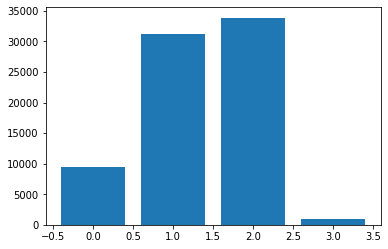

In [24]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(y_target)
for k,v in counter.items():
	per = v / len(y_target) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [25]:
dataframe.isna().sum().sum()

0

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=2, n=33881 (25.000%)
Class=0, n=33881 (25.000%)
Class=1, n=33881 (25.000%)
Class=3, n=33881 (25.000%)


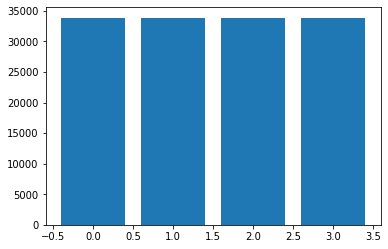

In [25]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(dataframe, y_target)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [28]:
X

array([[0.00000000e+00, 4.00000000e+00, 3.50000000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.00000000e+00, 2.10000000e+04, ...,
        3.33000000e+01, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.00000000e+04, ...,
        1.82000000e+01, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.32615484e-02, 4.00000000e+00, 9.37283084e+03, ...,
        5.94673845e+01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 4.00000000e+00, 4.97166467e+03, ...,
        9.90564336e+01, 2.83353267e-02, 0.00000000e+00],
       [5.65615812e-01, 1.00000000e+00, 2.13502565e+04, ...,
        8.68768375e+00, 0.00000000e+00, 1.13123162e+00]])

In [26]:
X=pd.DataFrame(X)
X.columns=X_features.columns
X

,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,0.000000,4.000000,35000.000000,0.150500,0.000000,1214.150000,2.000000,110000.000000,2.0,2.000000,0.0,9.130000,0.000000,1.000000,1.000000,1.000000,680.000000,684.000000,689.000000,685.000000,1.000000,7.000000,1.000000,5.000000,0.000000,10.000000,1.000000,0.000000,0.000000,43573.779596,43573.780000,35000.000000,8573.780000,0.000000,1.000000,551.000000,22049.000000,9213.000000,22800.000000,46565.000000,...,14.000000,2.000000,1.000000,34.000000,40.000000,46.000000,13.000000,1.000000,2.000000,1.000000,1.000000,39.000000,57.400000,47.000000,0.563000,0.000000,4.000000,5948.000000,3150.000000,7975.000000,0.00,0.000000,0.0000,0.0,1.000000,4.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,5.000000,7.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.0
1,0.000000,4.000000,21000.000000,0.140800,1.000000,489.510000,2.000000,54000.000000,0.0,2.000000,0.0,20.670000,0.000000,1.000000,1.000000,1.000000,710.000000,714.000000,589.000000,585.000000,0.000000,13.000000,1.000000,4.000000,1.000000,45.000000,1.000000,0.000000,0.000000,13274.320000,13274.320000,6376.130000,4750.300000,0.000000,0.000000,76.000000,86785.000000,76738.000000,23100.000000,119204.000000,...,1.000000,1.000000,13.000000,49.500000,147.000000,199.000000,1.000000,1.000000,3.000000,0.000000,2.000000,38.000000,67.700000,40.000000,0.435000,1.000000,2.000000,6186.000000,7232.000000,4623.000000,2147.89,0.000000,386.6202,0.0,0.000000,3.000000,5.000000,3.000000,3.000000,34.000000,10.000000,11.000000,5.000000,13.000000,0.000000,1.000000,100.000000,33.300000,1.000000,0.0
2,0.000000,1.000000,20000.000000,0.140800,1.000000,466.200000,2.000000,74000.000000,1.0,3.000000,0.0,18.330000,0.000000,2.000000,3.000000,1.000000,760.000000,764.000000,689.000000,685.000000,1.000000,14.000000,2.000000,4.000000,0.000000,20.000000,1.000000,10734.690000,10734.690000,15462.830000,15462.830000,9265.310000,6197.520000,0.000000,0.000000,0.000000,75396.000000,24268.000000,35900.000000,113398.000000,...,2.000000,3.000000,3.000000,15.500000,128.000000,375.000000,2.000000,2.000000,1.000000,1.000000,1.000000,97.000000,10.500000,46.000000,0.097000,1.000000,3.000000,1315.000000,5385.000000,28983.000000,0.00,0.000000,0.0000,0.0,0.000000,6.000000,7.000000,11.000000,14.000000,2.000000,12.000000,17.000000,7.000000,14.000000,0.000000,2.000000,100.000000,18.200000,0.000000,0.0
3,0.000000,4.000000,16000.000000,0.190300,0.000000,586.740000,3.000000,58000.000000,2.0,2.000000,0.0,29.050000,0.000000,0.000000,1.000000,1.000000,670.000000,674.000000,644.000000,640.000000,1.000000,10.000000,2.000000,5.000000,1.000000,34.000000,1.000000,0.000000,0.000000,20685.951468,20685.950000,16000.000000,4685.950000,0.000000,2.000000,2104.000000,43001.000000,22068.000000,24100.000000,53705.000000,...,2.000000,5.000000,16.000000,68.000000,119.000000,321.000000,2.000000,2.000000,2.000000,0.000000

In [ ]:
'''abc = pd.DataFrame(lending_data)
abc
abc.columns=['application_type' ,'home_ownership' ,'loan_status' ,'loan_amnt' ,'int_rate' ,'term' ,'installment' ,'grade' ,'annual_inc' ,'verification_status' ,'purpose' ,'hardship_flag' ,'dti' ,'delinq_2yrs' ,'inq_fi' ,'inq_last_12m' ,'inq_last_6mths' ,'fico_range_low' ,'fico_range_high' ,'last_fico_range_high' ,'last_fico_range_low' ,'mort_acc' ,'open_acc' ,'open_acc_6m' ,'acc_open_past_24mths' ,'pub_rec' ,'total_acc' ,'initial_list_status' ,'out_prncp' ,'out_prncp_inv' ,'total_pymnt' ,'total_pymnt_inv' ,'total_rec_prncp' ,'total_rec_int' ,'total_rec_late_fee' ,'total_cu_tl' ,'tot_coll_amt' ,'tot_cur_bal' ,'total_bal_il' ,'total_rev_hi_lim' ,'tot_hi_cred_lim' ,'total_bal_ex_mort' ,'total_bc_limit' ,'total_il_high_credit_limit' ,'mths_since_recent_bc' ,'mths_since_recent_inq' ,'mths_since_rcnt_il' ,'mths_since_last_delinq' ,'mo_sin_old_il_acct' ,'mo_sin_old_rev_tl_op' ,'mo_sin_rcnt_rev_tl_op' ,'mo_sin_rcnt_tl' ,'open_act_il' ,'open_il_12m' ,'open_il_24m' ,'il_util' ,'bc_util' ,'all_util' ,'revol_util' ,'open_rv_12m' ,'open_rv_24m' ,'max_bal_bc' ,'avg_cur_bal' ,'bc_open_to_buy' ,'recoveries' ,'chargeoff_within_12_mths' ,'collection_recovery_fee' ,'collections_12_mths_ex_med' ,'num_accts_ever_120_pd' ,'num_actv_bc_tl' ,'num_actv_rev_tl' ,'num_bc_sats' ,'num_bc_tl' ,'num_il_tl' ,'num_op_rev_tl' ,'num_rev_accts' ,'num_rev_tl_bal_gt_0' ,'num_sats' ,'num_tl_90g_dpd_24m' ,'num_tl_op_past_12m' ,'pct_tl_nvr_dlq' ,'percent_bc_gt_75' ,'pub_rec_bankruptcies' ,'tax_liens']
'''

In [27]:
#dropping all rows with nan values results in a massive data loss
#new_df=lending_data.dropna()
#finding the number of null values for each variable or column
nul_vals_1=X.isna().sum()
nul_vals_1=nul_vals_1.reset_index()
#Checking which variables have more than 1 missing values
high_nul_vals_1=nul_vals_1[nul_vals_1[0] >= 1]
print(high_nul_vals_1)




Empty DataFrame
Columns: [index, 0]
Index: []


In [ ]:
#from sklearn.preprocessing import LeaveOneOutEncoder
#LooE=LeaveOneOutEncoder()

#encoder = ce.BackwardDifferenceEncoder(cols=['loan_status'])
#df_bd = encoder.fit_transform(lending_data)

#lending_data["loan_stat_code"] = LeaveOneOutEncoder.fit_transform(lending_data[["loan_status"]])

#lending_data[["loan_stat_code", "loan_status"]]
#print(lending_data["loan_stat_code"].unique())
#print(lending_data["loan_status"].unique())
#df_bd


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,application_type,home_ownership,loan_status_0,loan_status_1,loan_status_2,loan_status_3,loan_status_4,loan_status_5,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,total_bc_limit,total_il_high_credit_limit,mths_since_recent_bc,mths_since_rcnt_il,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,loan_stat_code
0,1,Individual,RENT,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,35000,0.1505,36 months,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,w,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,...,18700,23765,14.0,1.0,40.0,46,13,1,2.0,1.0,1.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
1,1,Individual,RENT,0.142857,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,21000,0.1408,60 months,489.51,C,54000.0,Not Verified,debt_consolidation,N,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,w,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,...,14300,96104,1.0,13.0,147.0,199,1,1,3.0,0.0,2.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
2,1,Individual,MORTGAGE,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,20000,0.1408,60 months,466.20,C,74000.0,Verified,home_improvement,N,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,w,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,...,32400,25000,2.0,3.0,128.0,375,2,2,1.0,1.0,1.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
3,1,Individual,RENT,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,16000,0.1903,36 months,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,w,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,...,24100,29605,2.0,16.0,119.0,321,2,2,2.0,0.0,2.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
4,1,Individual,MORTGAGE,-0.857143,-0.714286,-0.571429,-0.428571,-0.285714,-0.142857,24000,0.0890,60 months,497.04,A,94020.0,Verified,debt_consolidation,N,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,w,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,...,25800,48962,122.0,NaN,147.0,308,88,10,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0,<loo_encoder.encoder.LeaveOneOutEncoder object...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,1,Individual,MORTGAGE,0.142857,0.285714,-0.571429,-0.428571,-0.285714,-0.142857,3500,0.1505,36 months,121.42,C,109000.0,Verified,other,N,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,w,470.57,470.57,3881.060000,3881.06

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder
lending_data

#ord_enc = OrdinalEncoder()
#lending_data["loan_status"] = ord_enc.fit_transform(lending_data[["loan_status"]])
#lending_data[["loan_stat_code", "loan_status"]]
#print(lending_data["loan_stat_code"].unique())
#print(lending_data["loan_status"].unique())
#lending_data

,col_0,col_1,col_0,col_0,col_1,col_1,col_0,col_0,col_1,col_1,emp_title,home_ownership,loan_status,loan_amnt,int_rate,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,0,1,1,1,0,0,1,1,0,0,Stagehand,RENT,3.0,35000,0.1505,1214.15,C,110000.0,Verified,debt_consolidation,N,9.13,0,1.0,1.0,1,680,684,689,685,1,7,1.0,5,0,10,0.00,0.00,43573.779596,43573.78,...,14.0,2.0,1.0,34.0,40.0,46,13,1,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0,0.0000,0,1,4,5,4,4,2,5,6,5,7,0,1,80.0,0.0,0,0
1,0,1,0,1,1,0,0,1,1,0,Detention Deputy,RENT,0.0,21000,0.1408,489.51,C,54000.0,Not Verified,debt_consolidation,N,20.67,0,1.0,1.0,1,710,714,589,585,0,13,1.0,4,1,45,0.00,0.00,13274.320000,13274.32,...,1.0,1.0,13.0,NaN,147.0,199,1,1,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0,386.6202,0,0,3,5,3,3,34,10,11,5,13,0,1,100.0,33.3,1,0
2,0,1,0,1,1,0,0,1,1,0,NaN,MORTGAGE,1.0,20000,0.1408,466.20,C,74000.0,Verified,home_improvement,N,18.33,0,2.0,3.0,1,760,764,689,685,1,14,2.0,4,0,20,10734.69,10734.69,15462.830000,15462.83,...,2.0,3.0,3.0,NaN,128.0,375,2,2,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0,0.0000,0,0,6,7,11,14,2,12,17,7,14,0,2,100.0,18.2,0,0
3,0,1,1,1,0,0,1,1,0,0,Driver,RENT,3.0,16000,0.1903,586.74,D,58000.0,Source Verified,debt_consolidation,N,29.05,0,0.0,1.0,1,670,674,644,640,1,10,2.0,5,1,34,0.00,0.00,20685.951468,20685.95,...,2.0,5.0,16.0,68.0,119.0,321,2,2,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0,0.0000,0,0,8,8,8,20,4,8,27,8,10,0,2,95.7,75.0,1,0
4,0,1,0,1,1,0,0,1,1,0,JP Morgan Chase,MORTGAGE,3.0,24000,0.0890,497.04,A,94020.0,Verified,debt_consolidation,N,23.22,0,NaN,NaN,0,785,789,759,755,6,12,NaN,2,0,24,0.00,0.00,29997.021437,29997.02,...,122.0,14.0,NaN,NaN,147.0,308,88,10,NaN,NaN,NaN,NaN,1.8,NaN,0.242,NaN,NaN,NaN,32135.0,25325.0,0.00,0,0.0000,0,0,1,4,3,5,6,7,11,4,12,0,1,100.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77154,0,1,1,1,0,0,1,1,0,0,IT analyst,MORTGAGE,1.0,3500,0.1505,121.42,C,109000.0,Verified,other,N,32.49,0,0.0,3.0,4,695,699,724,720,2,16,1.0,3,0,28,470.57,470.57,3881.060000,3881.06,...,13.0,0.0,23.0,NaN,170.0,267,6,6,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0,0.0000,0,0,6,10,8,8,8,10,18,9,14,0,1,100.0,100.0,0,0
77155,0,1,1,1,0,0,1,1,0,0,Principal IA Engineer,MORTGAGE,1.0,2000,0.0797,62.65,A,180000.0,Not Verified,home_improvement,N,10.64,0,0.0,4.0,0,725,729,674,670,4,9,1.0,3,0,20,246.31,246.31,2003.910000,2003.91,...,68.0,3.0,6.0,NaN,138.0,177,10,6,3.0,1.0,2.0,54.0,66.8,55.0,0.590,1.0,1.0,4573.0,40519.0,3883.0,0.00,0,0.0000,0,0,3,4,3,4,9,5,7,4,9,0,2,100.0,66.7,0,0
77156,0,1,1,1,0,0,1,1,0,0,Attorney,RENT,3.0,7000,0.0532,210.81,A,148000.0,Not Verified,debt_consolidation,N,11.30,0,0.0,0.0,0,835,839,739,735,1,8,0.0,4,0,14,0.00,0.00,7146.946091,7146.95,...

In [154]:
#for col in lending_data.columns:
#    print(col)

#X.loc[:, X.columns != 'loan_status']
X['loan_status']


0         2
1         0
2         1
3         2
4         2
         ..
135519    3
135520    3
135521    3
135522    3
135523    3
Name: loan_status, Length: 135524, dtype: int64

In [ ]:
for i in lending_data.columns:
  print("'",np.asarray(i), "'", ',',end="")
  
  

' application_type ' ,' home_ownership ' ,' loan_status ' ,' loan_amnt ' ,' int_rate ' ,' term ' ,' installment ' ,' grade ' ,' annual_inc ' ,' verification_status ' ,' purpose ' ,' hardship_flag ' ,' dti ' ,' delinq_2yrs ' ,' inq_fi ' ,' inq_last_12m ' ,' inq_last_6mths ' ,' fico_range_low ' ,' fico_range_high ' ,' last_fico_range_high ' ,' last_fico_range_low ' ,' mort_acc ' ,' open_acc ' ,' open_acc_6m ' ,' acc_open_past_24mths ' ,' pub_rec ' ,' total_acc ' ,' initial_list_status ' ,' out_prncp ' ,' out_prncp_inv ' ,' total_pymnt ' ,' total_pymnt_inv ' ,' total_rec_prncp ' ,' total_rec_int ' ,' total_rec_late_fee ' ,' total_cu_tl ' ,' tot_coll_amt ' ,' tot_cur_bal ' ,' total_bal_il ' ,' total_rev_hi_lim ' ,' tot_hi_cred_lim ' ,' total_bal_ex_mort ' ,' total_bc_limit ' ,' total_il_high_credit_limit ' ,' mths_since_recent_bc ' ,' mths_since_recent_inq ' ,' mths_since_rcnt_il ' ,' mths_since_last_delinq ' ,' mo_sin_old_il_acct ' ,' mo_sin_old_rev_tl_op ' ,' mo_sin_rcnt_rev_tl_op ' ,' m

In [ ]:
'''
#normalising the data
from sklearn import preprocessing
normalized = preprocessing.normalize(dataframe)
a=pd.DataFrame(normalized)
a.columns=['application_type' ,'home_ownership' ,'loan_amnt' ,'int_rate' ,'term' ,'installment' ,'grade' ,'annual_inc' ,'verification_status' ,'purpose' ,'hardship_flag' ,'dti' ,'delinq_2yrs' ,'inq_fi' ,'inq_last_12m' ,'inq_last_6mths' ,'fico_range_low' ,'fico_range_high' ,'last_fico_range_high' ,'last_fico_range_low' ,'mort_acc' ,'open_acc' ,'open_acc_6m' ,'acc_open_past_24mths' ,'pub_rec' ,'total_acc' ,'initial_list_status' ,'out_prncp' ,'out_prncp_inv' ,'total_pymnt' ,'total_pymnt_inv' ,'total_rec_prncp' ,'total_rec_int' ,'total_rec_late_fee' ,'total_cu_tl' ,'tot_coll_amt' ,'tot_cur_bal' ,'total_bal_il' ,'total_rev_hi_lim' ,'tot_hi_cred_lim' ,'total_bal_ex_mort' ,'total_bc_limit' ,'total_il_high_credit_limit' ,'mths_since_recent_bc' ,'mths_since_recent_inq' ,'mths_since_rcnt_il' ,'mths_since_last_delinq' ,'mo_sin_old_il_acct' ,'mo_sin_old_rev_tl_op' ,'mo_sin_rcnt_rev_tl_op' ,'mo_sin_rcnt_tl' ,'open_act_il' ,'open_il_12m' ,'open_il_24m' ,'il_util' ,'bc_util' ,'all_util' ,'revol_util' ,'open_rv_12m' ,'open_rv_24m' ,'max_bal_bc' ,'avg_cur_bal' ,'bc_open_to_buy' ,'recoveries' ,'chargeoff_within_12_mths' ,'collection_recovery_fee' ,'collections_12_mths_ex_med' ,'num_accts_ever_120_pd' ,'num_actv_bc_tl' ,'num_actv_rev_tl' ,'num_bc_sats' ,'num_bc_tl' ,'num_il_tl' ,'num_op_rev_tl' ,'num_rev_accts' ,'num_rev_tl_bal_gt_0' ,'num_sats' ,'num_tl_90g_dpd_24m' ,'num_tl_op_past_12m' ,'pct_tl_nvr_dlq' ,'percent_bc_gt_75' ,'pub_rec_bankruptcies' ,'tax_liens']
a
'''

,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,0.0,0.000026,0.229820,9.882251e-07,0.000000,0.007972,0.000013,0.722291,0.000013,0.000013,0.0,0.000060,0.000000,0.000007,0.000007,0.000007,0.004465,0.004491,0.004524,0.004498,0.000007,0.000046,0.000007,0.000033,0.000000,0.000066,0.000007,0.000000,0.000000,0.286118,0.286118,0.229820,0.056298,0.0,0.000007,0.003618,0.144780,0.060495,0.149711,0.305759,...,0.000092,0.000013,0.000007,0.000223,0.000263,0.000302,0.000085,0.000007,0.000013,0.000007,0.000007,0.000256,0.000377,0.000309,3.696815e-06,0.000000e+00,0.000026,0.039056,0.020684,0.052366,0.000000,0.0,0.000000,0.0,0.000007,0.000026,0.000033,0.000026,0.000026,0.000013,0.000033,0.000039,0.000033,0.000046,0.0,0.000007,0.000525,0.000000,0.000000,0.0
1,0.0,0.000018,0.094842,6.358941e-07,0.000005,0.002211,0.000009,0.243880,0.000000,0.000009,0.0,0.000093,0.000000,0.000005,0.000005,0.000005,0.003207,0.003225,0.002660,0.002642,0.000000,0.000059,0.000005,0.000018,0.000005,0.000203,0.000005,0.000000,0.000000,0.059951,0.059951,0.028796,0.021454,0.0,0.000000,0.000343,0.391947,0.346571,0.104326,0.538360,...,0.000005,0.000005,0.000059,0.000224,0.000664,0.000899,0.000005,0.000005,0.000014,0.000000,0.000009,0.000172,0.000306,0.000181,1.964588e-06,4.516294e-06,0.000009,0.027938,0.032662,0.020879,0.009701,0.0,0.001746,0.0,0.000000,0.000014,0.000023,0.000014,0.000014,0.000154,0.000045,0.000050,0.000023,0.000059,0.0,0.000005,0.000452,0.000150,0.000005,0.0
2,0.0,0.000006,0.114617,8.069021e-07,0.000006,0.002672,0.000011,0.424082,0.000006,0.000017,0.0,0.000105,0.000000,0.000011,0.000017,0.000006,0.004355,0.004378,0.003949,0.003926,0.000006,0.000080,0.000011,0.000023,0.000000,0.000115,0.000006,0.061519,0.061519,0.088615,0.088615,0.053098,0.035517,0.0,0.000000,0.000000,0.432082,0.139076,0.205737,0.649866,...,0.000011,0.000017,0.000017,0.000089,0.000734,0.002149,0.000011,0.000011,0.000006,0.000006,0.000006,0.000556,0.000060,0.000264,5.558913e-07,5.730839e-06,0.000017,0.007536,0.030861,0.166097,0.000000,0.0,0.000000,0.0,0.000000,0.000034,0.000040,0.000063,0.000080,0.000011,0.000069,0.000097,0.000040,0.000080,0.0,0.000011,0.000573,0.000104,0.000000,0.0
3,0.0,0.000034,0.135611,1.612925e-06,0.000000,0.004973,0.000025,0.491590,0.000017,0.000017,0.0,0.000246,0.000000,0.000000,0.000008,0.000008,0.005679,0.005713,0.005458,0.005424,0.000008,0.000085,0.000017,0.000042,0.000008,0.000288,0.000008,0.000000,0.000000,0.175328,0.175328,0.135611,0.039717,0.0,0.000017,0.017833,0.364463,0.187042,0.204264,0.455187,...,0.000017,0.000042,0.000136,0.000576,0.001009,0.002721,0.000017,0.000017,0.000017,0.000000,0.000017,0.000636,0.000737,0.000678,7.365381e-06,1.695139e-05,0.000025,0.041429,0.036445,0.026843,0.000000,0.0,0.000000,0.0,0.000000,0.000068,0.000068,0.000068,0.000170,0.000034,0.000068,0.000229,0.000068,0.000085,0.0,0.000017,0.000811,0.000636,0.000008,0.0
4,0.0,0.000002,0.040406,1.498403e-

In [ ]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = dataframe  #independent columns
y = y_target   #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=17)
fit = bestfeatures.fit(X,y) 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 10 best features
'''

                      Specs         Score
27                out_prncp  2.399268e+08
28            out_prncp_inv  2.398935e+08
63               recoveries  8.485571e+07
31          total_rec_prncp  6.847025e+07
39          tot_hi_cred_lim  6.644202e+07
36              tot_cur_bal  5.212659e+07
29              total_pymnt  3.619236e+07
30          total_pymnt_inv  3.616939e+07
65  collection_recovery_fee  1.490221e+07
38         total_rev_hi_lim  1.040717e+07
41           total_bc_limit  8.798641e+06
7                annual_inc  8.416725e+06
62           bc_open_to_buy  7.878323e+06
61              avg_cur_bal  6.934013e+06
32            total_rec_int  6.019565e+06
2                 loan_amnt  2.431066e+06
40        total_bal_ex_mort  2.356539e+06


In [ ]:
'''
for i in a.columns:
  print(i)
'''

 application_type 
 home_ownership 
 loan_status 
 loan_amnt 
 int_rate 
 term 
 installment 
 grade 
 annual_inc 
 verification_status 
 purpose 
 hardship_flag 
 dti 
 delinq_2yrs 
 inq_fi 
 inq_last_12m 
 inq_last_6mths 
 fico_range_low 
 fico_range_high 
 last_fico_range_high 
 last_fico_range_low 
 mort_acc 
 open_acc 
 open_acc_6m 
 acc_open_past_24mths 
 pub_rec 
 total_acc 
 initial_list_status 
 out_prncp 
 out_prncp_inv 
 total_pymnt 
 total_pymnt_inv 
 total_rec_prncp 
 total_rec_int 
 total_rec_late_fee 
 total_cu_tl 
 tot_coll_amt 
 tot_cur_bal 
 total_bal_il 
 total_rev_hi_lim 
 tot_hi_cred_lim 
 total_bal_ex_mort 
 total_bc_limit 
 total_il_high_credit_limit 
 mths_since_recent_bc 
 mths_since_recent_inq 
 mths_since_rcnt_il 
 mths_since_last_delinq 
 mo_sin_old_il_acct 
 mo_sin_old_rev_tl_op 
 mo_sin_rcnt_rev_tl_op 
 mo_sin_rcnt_tl 
 open_act_il 
 open_il_12m 
 open_il_24m 
 il_util 
 bc_util 
 all_util 
 revol_util 
 open_rv_12m 
 open_rv_24m 
 max_bal_bc 
 avg_cur_bal

In [ ]:
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = dataframe  #independent columns
y = y_target    #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=17)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print 10 best features
'''

                      Specs         Score
27                out_prncp  2.399268e+08
28            out_prncp_inv  2.398935e+08
63               recoveries  8.485571e+07
31          total_rec_prncp  6.847025e+07
39          tot_hi_cred_lim  6.644202e+07
36              tot_cur_bal  5.212659e+07
29              total_pymnt  3.619236e+07
30          total_pymnt_inv  3.616939e+07
65  collection_recovery_fee  1.490221e+07
38         total_rev_hi_lim  1.040717e+07
41           total_bc_limit  8.798641e+06
7                annual_inc  8.416725e+06
62           bc_open_to_buy  7.878323e+06
61              avg_cur_bal  6.934013e+06
32            total_rec_int  6.019565e+06
2                 loan_amnt  2.431066e+06
40        total_bal_ex_mort  2.356539e+06


In [28]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# configure to select all features
selector = SelectKBest(score_func=mutual_info_classif, k='all')

# transform train input data
Xfs = selector.fit_transform(X,y)

#Retrieve the column names for the selected columns
names = X.columns.values[selector.get_support()]
#and their scores
scores = selector.scores_[selector.get_support()]
#pair the values together with the zip function
names_scores = list(zip(names, scores))
#Store the information in a data frame
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'Mutual_info'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['Mutual_info', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

                    Feat_names  Mutual_info
8          verification_status     1.393522
27                   out_prncp     0.750361
28               out_prncp_inv     0.746864
31             total_rec_prncp     0.689908
19         last_fico_range_low     0.630910
..                         ...          ...
36                 tot_cur_bal     0.019692
66  collections_12_mths_ex_med     0.012769
40           total_bal_ex_mort     0.010885
64    chargeoff_within_12_mths     0.007608
37                total_bal_il     0.006682

[83 rows x 2 columns]


In [29]:
ft=list(ns_df_sorted['Feat_names'].head(20))
selected_var_1=X[ft]

In [30]:
corr = X.corr()
corr

,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
application_type,1.000000,-0.128762,0.148900,0.051971,0.107875,0.127791,0.050784,-0.111565,0.014425,-0.019538,0.023833,0.242103,-0.007126,0.018544,0.011595,-0.044740,0.116785,0.116792,0.041976,0.029658,0.072934,-0.020691,-0.018647,-0.036999,-0.021725,0.003281,0.041587,0.118385,0.118384,0.100908,0.100923,0.070694,0.119626,0.048907,0.054979,-0.020722,0.068046,0.020359,-0.008104,0.066674,...,0.051505,0.010355,0.025396,-0.018034,0.028817,0.026858,0.036318,0.025663,-0.000448,0.000819,-0.008825,0.013774,-0.008616,0.001106,-0.011568,-0.044823,-0.054441,-0.002187,0.088167,-0.010256,0.023968,-0.012104,0.022746,-0.026885,-0.011958,-0.076881,-0.060964,-0.071254,-0.043979,0.010348,-0.033229,-0.018543,-0.051137,-0.019199,-0.014458,-0.027646,0.018098,0.003333,-0.014242,-0.017359
home_ownership,-0.128762,1.000000,-0.208117,0.066803,-0.129037,-0.170140,0.064396,-0.152091,-0.018630,0.052665,0.021773,-0.032362,-0.062137,-0.107135,-0.114593,-0.037623,-0.091869,-0.091871,-0.136983,-0.132130,-0.550958,-0.157722,-0.086540,-0.099843,0.014387,-0.246096,-0.048449,-0.089229,-0.089262,-0.196635,-0.196726,-0.185346,-0.128882,-0.029069,-0.143584,-0.000874,-0.532248,-0.084838,-0.191639,-0.530925,...,-0.039604,0.068188,0.082163,0.068110,-0.171013,-0.205237,-0.007283,0.082220,0.002318,-0.083335,-0.099620,-0.006597,-0.023143,0.008142,-0.031557,0.001690,0.016899,-0.152638,-0.480739,-0.093495,-0.018534,-0.005135,-0.018551,0.017734,-0.006598,-0.054449,-0.086206,-0.072828,-0.129597,-0.097392,-0.099959,-0.161305,-0.088183,-0.157176,0.001126,-0.093467,0.021319,-0.036597,0.014639,0.008186
loan_amnt,0.148900,-0.208117,1.000000,0.125743,0.433009,0.944862,0.128172,0.310464,-0.013743,-0.138886,0.054244,0.050699,0.016612,0.010963,0.029899,0.009719,0.118795,0.118798,0.074970,0.082743,0.253726,0.208495,0.002421,0.022460,-0.027429,0.237647,0.102901,0.459222,0.459205,0.837031,0.837088,0.696650,0.727480,0.155634,0.092819,-0.031346,0.332520,0.172394,0.354413,0.358435,...,0.024002,-0.026174,-0.064537,-0.018168,0.128497,0.177764,0.040208,0.004777,0.063971,0.024613,0.049767,-0.061702,0.044827,-0.015012,0.090420,-0.040021,-0.026433,0.359365,0.245694,0.212810,0.213842,-0.010097,0.210842,-0.020135,-0.059684,0.197571,0.156878,0.227051,0.231842,0.112297,0.173479,0.194696,0.153413,0.208531,-0.010978,-0.006876,0.089360,0.031663,-0.052262,0.010707
int_rate,0.051971,0.066803,0.125743,1.000000,0.358079,0.179132,0.969032,-0.057032,-0.086361,0.041779,0.002609,0.086919,0.059697,0.159208,0.175825,0.165320,-0.423004,-0.422999,-0.332735,-0.251653,-0.097561,-0.008771,0.115144,0.172243,0.048458,-0.040028,-0.113954,0.120243,0.120271,0.092237,0.092388,-0.123595,0.506778,0.097741,0.024547,0.008264,-0.052985,0.052229,-0.185597,-0.092501,...,-0.065893,-0.110662,-0.071186,-0.031741,-0.038939,-0.137859,-0.076012,-0.102833,0.045006,0.165430,0.162714,0.131667,0.286093,0.2996

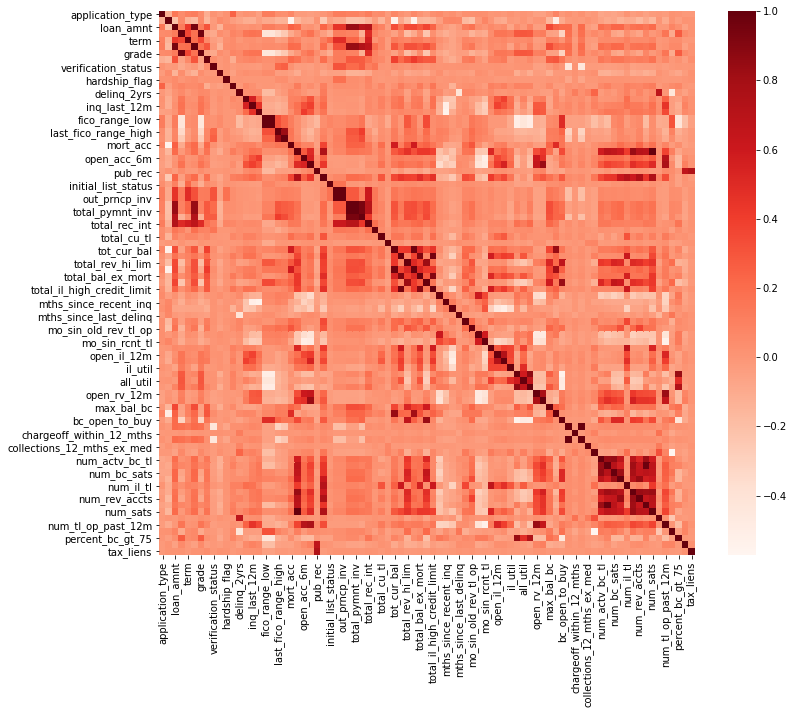

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [33]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.2:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
data = X[selected_columns]

In [34]:
selected_columns

Index(['application_type', 'home_ownership', 'loan_amnt', 'int_rate',
       'verification_status', 'purpose', 'hardship_flag', 'delinq_2yrs',
       'inq_fi', 'fico_range_low', 'pub_rec', 'total_rec_late_fee',
       'tot_coll_amt', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'mths_since_rcnt_il', 'mths_since_last_delinq',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med'],
      dtype='object')

In [35]:
lending_data_all=X
lending_data_all["loan_status"]=y
lending_data_all.isna().sum().sum()

0

[6.43077396e-04 6.28345789e-04 1.11942241e-02 2.73369038e-03
 1.16165653e-02 9.07661725e-03 2.45771893e-03 5.69817589e-04
 4.44666607e-01 8.05321760e-04 1.85114198e-02 5.65008359e-04
 3.88319345e-04 5.51882273e-04 6.71557738e-04 6.40420701e-04
 7.00949592e-04 6.86106939e-04 3.53369166e-02 2.78334025e-02
 5.45421896e-04 5.00393654e-04 5.51103640e-04 7.91770508e-04
 3.31261764e-04 6.45747181e-04 3.40778697e-03 1.43240876e-01
 1.51193365e-01 1.31950411e-02 1.15252425e-02 3.26092328e-02
 1.20179483e-02 1.77040467e-03 5.72334793e-04 3.94209033e-04
 5.02475293e-04 4.68320490e-04 5.67499640e-04 5.37432533e-04
 5.21934124e-04 6.28255852e-04 5.03438862e-04 5.22105917e-04
 6.27762314e-04 6.28864943e-04 5.40755530e-04 5.46768649e-04
 7.05314157e-04 5.31451904e-04 5.35123699e-04 4.68144071e-04
 7.30373598e-04 7.18981219e-04 5.85184244e-04 6.11220843e-04
 5.47602440e-04 6.71501759e-04 5.29910791e-04 5.76677340e-04
 5.99356180e-04 5.09341429e-04 5.37907344e-04 1.67912578e-02
 8.69355076e-05 1.593654

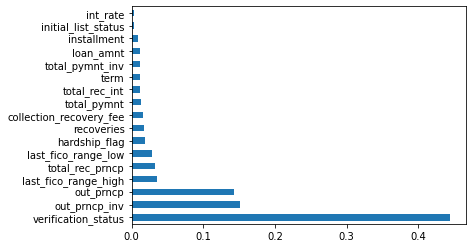

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X = dataframe  #independent columns
y = y_target    #target column 
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

[-1 -1 -1 ... -1 -1 -1]
Total number of outliers identified is:  135524
Ground truth: 
 [-1 -1 -1 ... -1 -1 -1]
Predicted outliers: 
 [1 1 1 ... 1 1 1]
Number of predicted outliers: 13553
Number of incorrectly identified outliers:  0


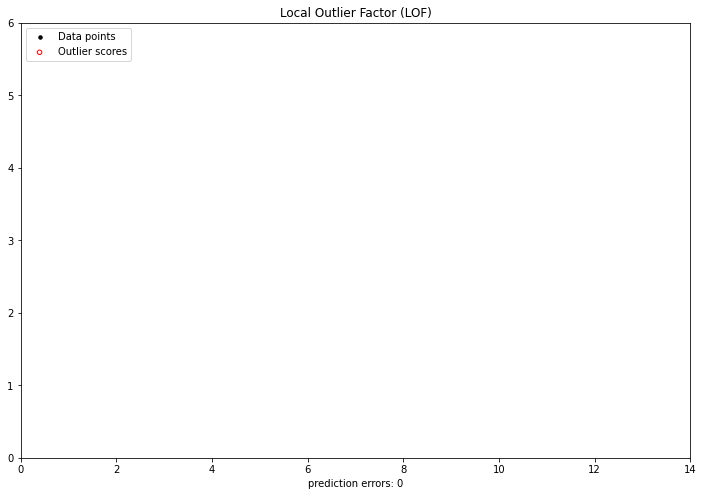

In [40]:
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 4, eps = 3)
clusters = outlier_detection.fit_predict(X)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)
ground_truth = clusters
print ("Ground truth: \n", ground_truth)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)

print ("Predicted outliers: \n",y_pred)

#Calculate number of outliers
outlierN = len([i for i in y_pred if i == -1])
print ("Number of predicted outliers:",outlierN)

#Calculate number of erroneos predictions
newarray= ((y_pred == -1) & (ground_truth==0))
#print(newarray)
n_errors= len([i for i in newarray if i==True])
print("Number of incorrectly identified outliers: ",n_errors)

#Let us see graphically how the outliers are identified
#Use outlier scores calculated by the algorithm to plot a circle around the outlier proportional to score.

X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(12,8))
plt.title("Local Outlier Factor (LOF)")

#Convert the df to an array for the purpose of the scatterplot
Xol = lending_data_all.to_numpy()

#Use scatter 
plt.scatter(Xol[:, 2], Xol[:, 3], color='k', s=3, label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xol[:, 2], Xol[:, 3], s=500 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
plt.xlim((0, 14))
plt.ylim((0, 6))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [12]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [41]:
#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=150, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X)
print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

#Calculate number of erroneos predictions where outlier predicction does not coindice with groundtruth
newarray= ((preds == -1) & (ground_truth==0))

n_errors= len([i for i in newarray if i==True])
print("Number of incorrectly identified outliers: ",n_errors)

[1 1 1 ... 1 1 1]
Total number of outliers identified is:  5832
Number of incorrectly identified outliers:  0


In [152]:
lending_data_all

,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,...,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,loan_status
0,0.000000,4.000000,35000.000000,0.150500,0.000000,1214.150000,2.000000,110000.000000,2.0,2.000000,0.0,9.130000,0.000000,1.000000,1.000000,1.000000,680.000000,684.000000,689.000000,685.000000,1.000000,7.000000,1.000000,5.000000,0.000000,10.000000,1.000000,0.000000,0.000000,43573.779596,43573.780000,35000.000000,8573.780000,0.000000,1.000000,551.0000,22049.000000,9213.000000,22800.000000,46565.000000,...,2.000000,1.000000,34.000000,40.000000,46.000000,13.000000,1.000000,2.000000,1.000000,1.000000,39.000000,57.400000,47.000000,0.563000,0.000000,4.000000,5948.000000,3150.000000,7975.000000,0.00,0.0,0.0000,0.0,1.000000,4.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,5.000000,7.000000,0.0,1.000000,80.000000,0.000000,0.000000,0.0,2
1,0.000000,4.000000,21000.000000,0.140800,1.000000,489.510000,2.000000,54000.000000,0.0,2.000000,0.0,20.670000,0.000000,1.000000,1.000000,1.000000,710.000000,714.000000,589.000000,585.000000,0.000000,13.000000,1.000000,4.000000,1.000000,45.000000,1.000000,0.000000,0.000000,13274.320000,13274.320000,6376.130000,4750.300000,0.000000,0.000000,76.0000,86785.000000,76738.000000,23100.000000,119204.000000,...,1.000000,13.000000,49.500000,147.000000,199.000000,1.000000,1.000000,3.000000,0.000000,2.000000,38.000000,67.700000,40.000000,0.435000,1.000000,2.000000,6186.000000,7232.000000,4623.000000,2147.89,0.0,386.6202,0.0,0.000000,3.000000,5.000000,3.000000,3.000000,34.000000,10.000000,11.000000,5.000000,13.000000,0.0,1.000000,100.000000,33.300000,1.000000,0.0,0
2,0.000000,1.000000,20000.000000,0.140800,1.000000,466.200000,2.000000,74000.000000,1.0,3.000000,0.0,18.330000,0.000000,2.000000,3.000000,1.000000,760.000000,764.000000,689.000000,685.000000,1.000000,14.000000,2.000000,4.000000,0.000000,20.000000,1.000000,10734.690000,10734.690000,15462.830000,15462.830000,9265.310000,6197.520000,0.000000,0.000000,0.0000,75396.000000,24268.000000,35900.000000,113398.000000,...,3.000000,3.000000,15.500000,128.000000,375.000000,2.000000,2.000000,1.000000,1.000000,1.000000,97.000000,10.500000,46.000000,0.097000,1.000000,3.000000,1315.000000,5385.000000,28983.000000,0.00,0.0,0.0000,0.0,0.000000,6.000000,7.000000,11.000000,14.000000,2.000000,12.000000,17.000000,7.000000,14.000000,0.0,2.000000,100.000000,18.200000,0.000000,0.0,1
3,0.000000,4.000000,16000.000000,0.190300,0.000000,586.740000,3.000000,58000.000000,2.0,2.000000,0.0,29.050000,0.000000,0.000000,1.000000,1.000000,670.000000,674.000000,644.000000,640.000000,1.000000,10.000000,2.000000,5.000000,1.000000,34.000000,1.000000,0.000000,0.000000,20685.951468,20685.950000,16000.000000,4685.950000,0.000000,2.000000,2104.0000,43001.000000,22068.000000,24100.000000,53705.000000,...,5.000000,16.000000,68.000000,119.000000,321.000000,2.000000,2.000000,2.000000,0.000000,2.000000,75.000000,86.900000,80.000000,0.869000,2.000000,3.000000,4888.000000

In [159]:
len(X)

135524

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_var_1, y, test_size=0.2, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [44]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [45]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999262128758531


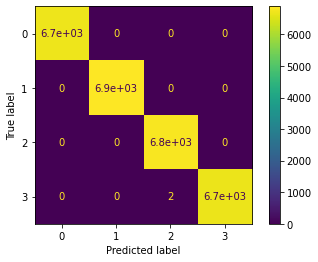

In [46]:
from sklearn.metrics import confusion_matrix

#we can get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)


In [49]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [50]:
y_pred=svc.predict(X_test)

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8343110127282789


In [52]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train);

In [53]:
y_pred=naive_bayes.predict(X_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9950193691200886


In [47]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf_dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_dt.predict(X_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [43]:
y_train

array([0, 1, 0, ..., 0, 1, 2])

In [163]:
X

,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,0.000000,4.000000,35000.000000,0.150500,0.000000,1214.150000,2.000000,110000.000000,2.0,2.000000,0.0,9.130000,0.000000,1.000000,1.000000,1.000000,680.000000,684.000000,689.000000,685.000000,1.000000,7.000000,1.000000,5.000000,0.000000,10.000000,1.000000,0.000000,0.000000,43573.779596,43573.780000,35000.000000,8573.780000,0.000000,1.000000,551.0000,22049.000000,9213.000000,22800.000000,46565.000000,...,14.000000,2.000000,1.000000,34.000000,40.000000,46.000000,13.000000,1.000000,2.000000,1.000000,1.000000,39.000000,57.400000,47.000000,0.563000,0.000000,4.000000,5948.000000,3150.000000,7975.000000,0.00,0.0,0.0000,0.0,1.000000,4.000000,5.000000,4.000000,4.000000,2.000000,5.000000,6.000000,5.000000,7.000000,0.0,1.000000,80.000000,0.000000,0.000000,0.0
1,0.000000,4.000000,21000.000000,0.140800,1.000000,489.510000,2.000000,54000.000000,0.0,2.000000,0.0,20.670000,0.000000,1.000000,1.000000,1.000000,710.000000,714.000000,589.000000,585.000000,0.000000,13.000000,1.000000,4.000000,1.000000,45.000000,1.000000,0.000000,0.000000,13274.320000,13274.320000,6376.130000,4750.300000,0.000000,0.000000,76.0000,86785.000000,76738.000000,23100.000000,119204.000000,...,1.000000,1.000000,13.000000,49.500000,147.000000,199.000000,1.000000,1.000000,3.000000,0.000000,2.000000,38.000000,67.700000,40.000000,0.435000,1.000000,2.000000,6186.000000,7232.000000,4623.000000,2147.89,0.0,386.6202,0.0,0.000000,3.000000,5.000000,3.000000,3.000000,34.000000,10.000000,11.000000,5.000000,13.000000,0.0,1.000000,100.000000,33.300000,1.000000,0.0
2,0.000000,1.000000,20000.000000,0.140800,1.000000,466.200000,2.000000,74000.000000,1.0,3.000000,0.0,18.330000,0.000000,2.000000,3.000000,1.000000,760.000000,764.000000,689.000000,685.000000,1.000000,14.000000,2.000000,4.000000,0.000000,20.000000,1.000000,10734.690000,10734.690000,15462.830000,15462.830000,9265.310000,6197.520000,0.000000,0.000000,0.0000,75396.000000,24268.000000,35900.000000,113398.000000,...,2.000000,3.000000,3.000000,15.500000,128.000000,375.000000,2.000000,2.000000,1.000000,1.000000,1.000000,97.000000,10.500000,46.000000,0.097000,1.000000,3.000000,1315.000000,5385.000000,28983.000000,0.00,0.0,0.0000,0.0,0.000000,6.000000,7.000000,11.000000,14.000000,2.000000,12.000000,17.000000,7.000000,14.000000,0.0,2.000000,100.000000,18.200000,0.000000,0.0
3,0.000000,4.000000,16000.000000,0.190300,0.000000,586.740000,3.000000,58000.000000,2.0,2.000000,0.0,29.050000,0.000000,0.000000,1.000000,1.000000,670.000000,674.000000,644.000000,640.000000,1.000000,10.000000,2.000000,5.000000,1.000000,34.000000,1.000000,0.000000,0.000000,20685.951468,20685.950000,16000.000000,4685.950000,0.000000,2.000000,2104.0000,43001.000000,22068.000000,24100.000000,53705.000000,...,2.000000,5.000000,16.000000,68.000000,119.000000,321.000000,2.000000,2.000000,2.000000,0.000000,2.000000,75.000000,86.900000,80.00000

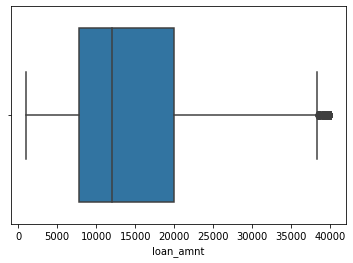

In [ ]:
import seaborn as sns
sns.boxplot(x=lending_data['loan_amnt'])

In [90]:
dataframe

,application_type,home_ownership,loan_amnt,int_rate,term,installment,grade,annual_inc,verification_status,purpose,hardship_flag,dti,delinq_2yrs,inq_fi,inq_last_12m,inq_last_6mths,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,mort_acc,open_acc,open_acc_6m,acc_open_past_24mths,pub_rec,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,total_cu_tl,tot_coll_amt,tot_cur_bal,total_bal_il,total_rev_hi_lim,tot_hi_cred_lim,...,mths_since_recent_bc,mths_since_recent_inq,mths_since_rcnt_il,mths_since_last_delinq,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,open_act_il,open_il_12m,open_il_24m,il_util,bc_util,all_util,revol_util,open_rv_12m,open_rv_24m,max_bal_bc,avg_cur_bal,bc_open_to_buy,recoveries,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,0.0,4.0,35000.0,0.1505,0.0,1214.15,2.0,110000.0,2.0,2.0,0.0,9.13,0.0,1.0,1.0,1.0,680.0,684.0,689.0,685.0,1.0,7.0,1.0,5.0,0.0,10.0,1.0,0.00,0.00,43573.779596,43573.78,35000.00,8573.78,0.0,1.0,551.0,22049.0,9213.0,22800.0,46565.0,...,14.0,2.0,1.0,34.0,40.0,46.0,13.0,1.0,2.0,1.0,1.0,39.0,57.4,47.0,0.563,0.0,4.0,5948.0,3150.0,7975.0,0.00,0.0,0.0000,0.0,1.0,4.0,5.0,4.0,4.0,2.0,5.0,6.0,5.0,7.0,0.0,1.0,80.0,0.0,0.0,0.0
1,0.0,4.0,21000.0,0.1408,1.0,489.51,2.0,54000.0,0.0,2.0,0.0,20.67,0.0,1.0,1.0,1.0,710.0,714.0,589.0,585.0,0.0,13.0,1.0,4.0,1.0,45.0,1.0,0.00,0.00,13274.320000,13274.32,6376.13,4750.30,0.0,0.0,76.0,86785.0,76738.0,23100.0,119204.0,...,1.0,1.0,13.0,49.5,147.0,199.0,1.0,1.0,3.0,0.0,2.0,38.0,67.7,40.0,0.435,1.0,2.0,6186.0,7232.0,4623.0,2147.89,0.0,386.6202,0.0,0.0,3.0,5.0,3.0,3.0,34.0,10.0,11.0,5.0,13.0,0.0,1.0,100.0,33.3,1.0,0.0
2,0.0,1.0,20000.0,0.1408,1.0,466.20,2.0,74000.0,1.0,3.0,0.0,18.33,0.0,2.0,3.0,1.0,760.0,764.0,689.0,685.0,1.0,14.0,2.0,4.0,0.0,20.0,1.0,10734.69,10734.69,15462.830000,15462.83,9265.31,6197.52,0.0,0.0,0.0,75396.0,24268.0,35900.0,113398.0,...,2.0,3.0,3.0,15.5,128.0,375.0,2.0,2.0,1.0,1.0,1.0,97.0,10.5,46.0,0.097,1.0,3.0,1315.0,5385.0,28983.0,0.00,0.0,0.0000,0.0,0.0,6.0,7.0,11.0,14.0,2.0,12.0,17.0,7.0,14.0,0.0,2.0,100.0,18.2,0.0,0.0
3,0.0,4.0,16000.0,0.1903,0.0,586.74,3.0,58000.0,2.0,2.0,0.0,29.05,0.0,0.0,1.0,1.0,670.0,674.0,644.0,640.0,1.0,10.0,2.0,5.0,1.0,34.0,1.0,0.00,0.00,20685.951468,20685.95,16000.00,4685.95,0.0,2.0,2104.0,43001.0,22068.0,24100.0,53705.0,...,2.0,5.0,16.0,68.0,119.0,321.0,2.0,2.0,2.0,0.0,2.0,75.0,86.9,80.0,0.869,2.0,3.0,4888.0,4300.0,3167.0,0.00,0.0,0.0000,0.0,0.0,8.0,8.0,8.0,20.0,4.0,8.0,27.0,8.0,10.0,0.0,2.0,95.7,75.0,1.0,0.0
4,0.0,1.0,24000.0,0.0890,1.0,497.04,0.0,94020.0,2.0,2.0,0.0,23.22,0.0,1.5,1.0,0.0,785.0,789.0,759.0,755.0,6.0,12.0,1.0,2.0,0.0,24.0,1.0,0.00,0.00,29997.021437,29997.02,24000.00,5997.02,0.0,2.5,0.0,353484.0,42762.0,63200.0,449124.0,...,122.0,14.0,5.5,36.5,147.0,308.0,88.0,10.0,2.0,1.0,2.5,56.5,1.8,33.0,0.242,0.5,1.0,13270.5,32135.0,25325.0,0.00,0.0,0.0000,0.0,0.0,1.0,4.0,3.0,5.0,6.0,7.0,11.0,4.0,12.0,0.0,1.0,100.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75527,0.0,1.0,3500.0,0.1505,0.0,121.42,2.0,109000.0,1.0,8.0,0.0,32.49,0.0,0.0,3.0,4.0,695.0,699.0,724.0,720.0,2.0,16.0,1.0,3.0,0.0,28.0,1.0,470.57,470.57,3881.060000,3881.06,3029.43,851.63,0.0,0.0,0.0,246635.0,33924.0,81750.0,317714.0,...,13.0,0.0,23.0,48.0,170.0,267.0,6.0,6.0,3.0,0.0,1.0,53.0,99.0,77.0,0.770,1.0,2.0,21441.0,17616.0,9350.0,0.00,0.0,0.0000,0.0,0.0,6.0,10.0,8.0,8.0,

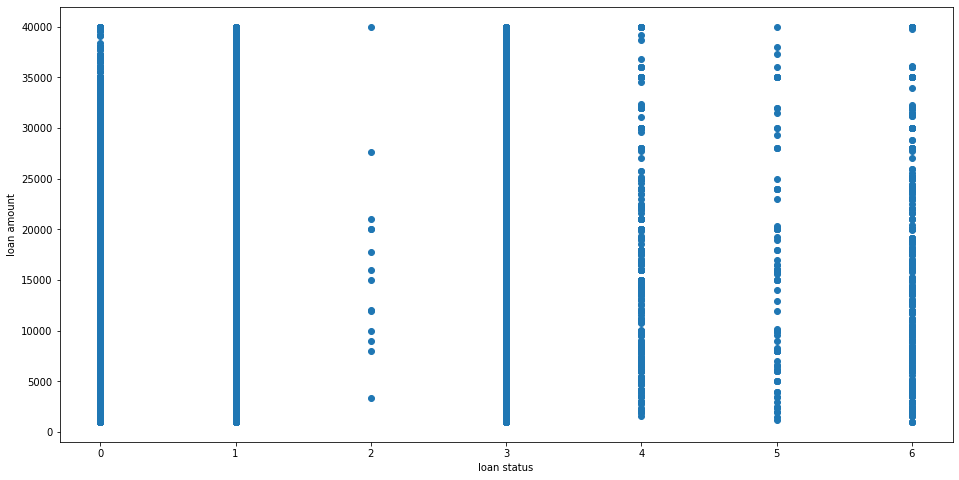

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(lending_data['loan_status'], lending_data['loan_amnt'])
ax.set_xlabel('loan status')
ax.set_ylabel('loan amount')
plt.show()